# Task 1 - Exploratory Data Analysis

## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('02_mushroom_species_data.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Data Summary
- Get a summary of the data
- Can see that there is no missing values in the dataset

In [4]:
# Summary of the dataset
df.info()

# Check for any missing values
df.isnull().sum()

# Display the unique values in the 'class' column
df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class
edible       4208
poisonous    3916
Name: count, dtype: int64

### Distribution of classes

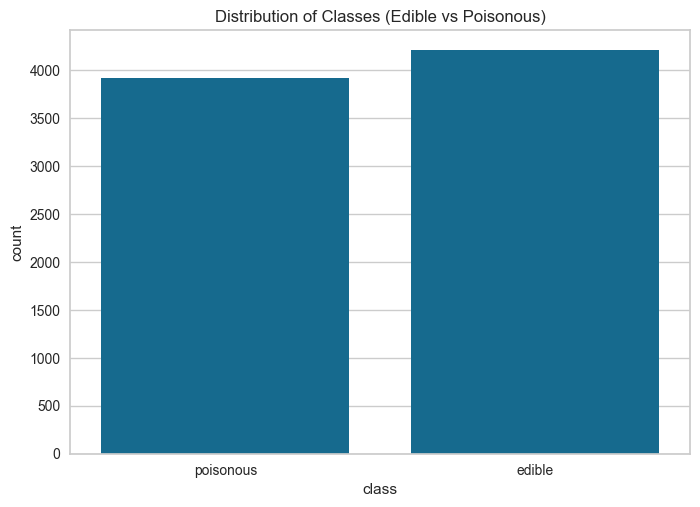

In [40]:
# Plot the distribution of the 'class' column
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes (Edible vs Poisonous)')
plt.show()

Distribution of classes:
- This bar chart shows the distribution of mushroom between two classes, edible (0) and poisonous (1)
- There are slightly more edible mushrooms (class 0) than poisonous ones (class 1)
- The dataset appears to be fairly balanced, with both classes having aorund 4000 sample each
- This visual shows that this dataset is balance and thus good for machine learning tasks as it reduces basi towards one class

### Distribtion of cap shape

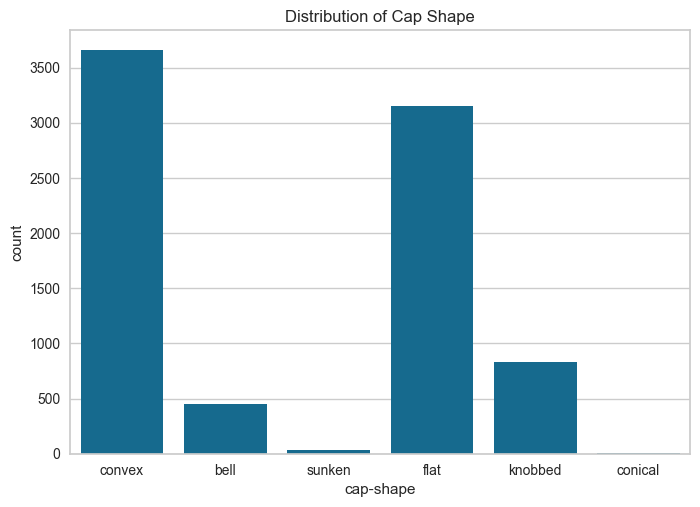

In [41]:
# Plot the distribution of 'cap-shape'
sns.countplot(x='cap-shape', data=df)
plt.title('Distribution of Cap Shape')
plt.show()

Distribution of cap shape:
- This chart displays the distribution of different mushroom cap shapes in the dataset
- There is a significant imbalance in the distribution of cap shapes, showing that most of the mushroom cap shapes are from convex and flat

### Cap colour vs class

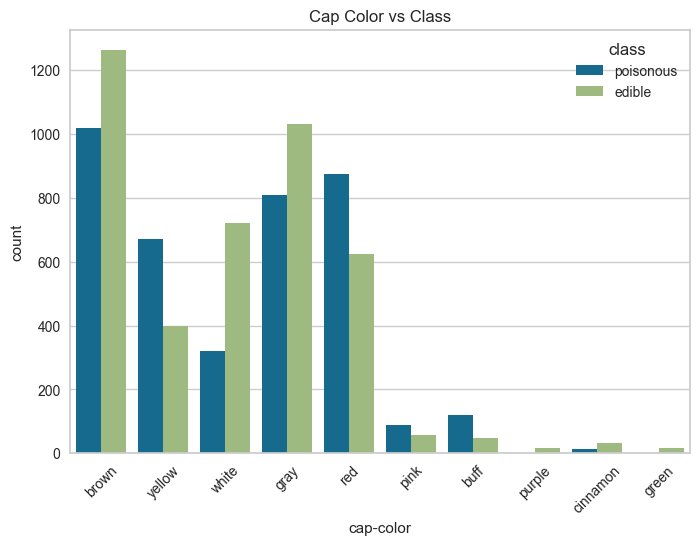

In [42]:
# Plot the relationship between 'cap-color' and 'class'
sns.countplot(x='cap-color', hue='class', data=df)
plt.title('Cap Color vs Class')
plt.xticks(rotation=45)
plt.show()

Cap colour vs Class:
- This chart shows the relationship between mushroom cap colours and their classification as edible(0) or poisonous (1)
- Cap colour brown is the most common, with more edible than poisonous mushrooms
- Yellow and white caps alsos how high counts, with more poisonous yellow caps

### Odor vs class

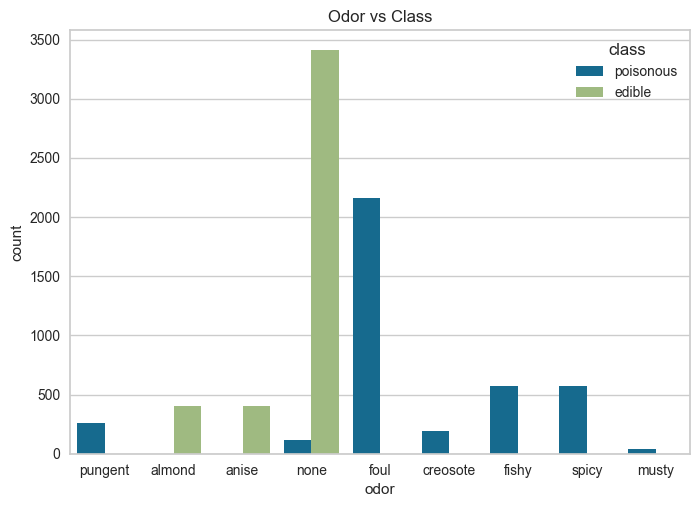

In [43]:
# Plot the relationship between 'odor' and 'class'
sns.countplot(x='odor', hue='class', data=df)
plt.title('Odor vs Class')
plt.show()

Odor vs Classes:
- None is the most common, with more ediblemushrooms in this category
- Foul oder is the second most common, predominatly associated with poisonous mushrooms
- Foul-smelling mushrooms are more liekly to be poisonous

## Encode Categorical Variables
- Since the dataset consist of categorical variables, use 'LabelEncoder' to convert them into numberical values for easier analysis in the correlation matrix

In [7]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to all columns
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows after encoding
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


## Correlation Matrix
- A correlation matrix is created to understand the relationship between different features

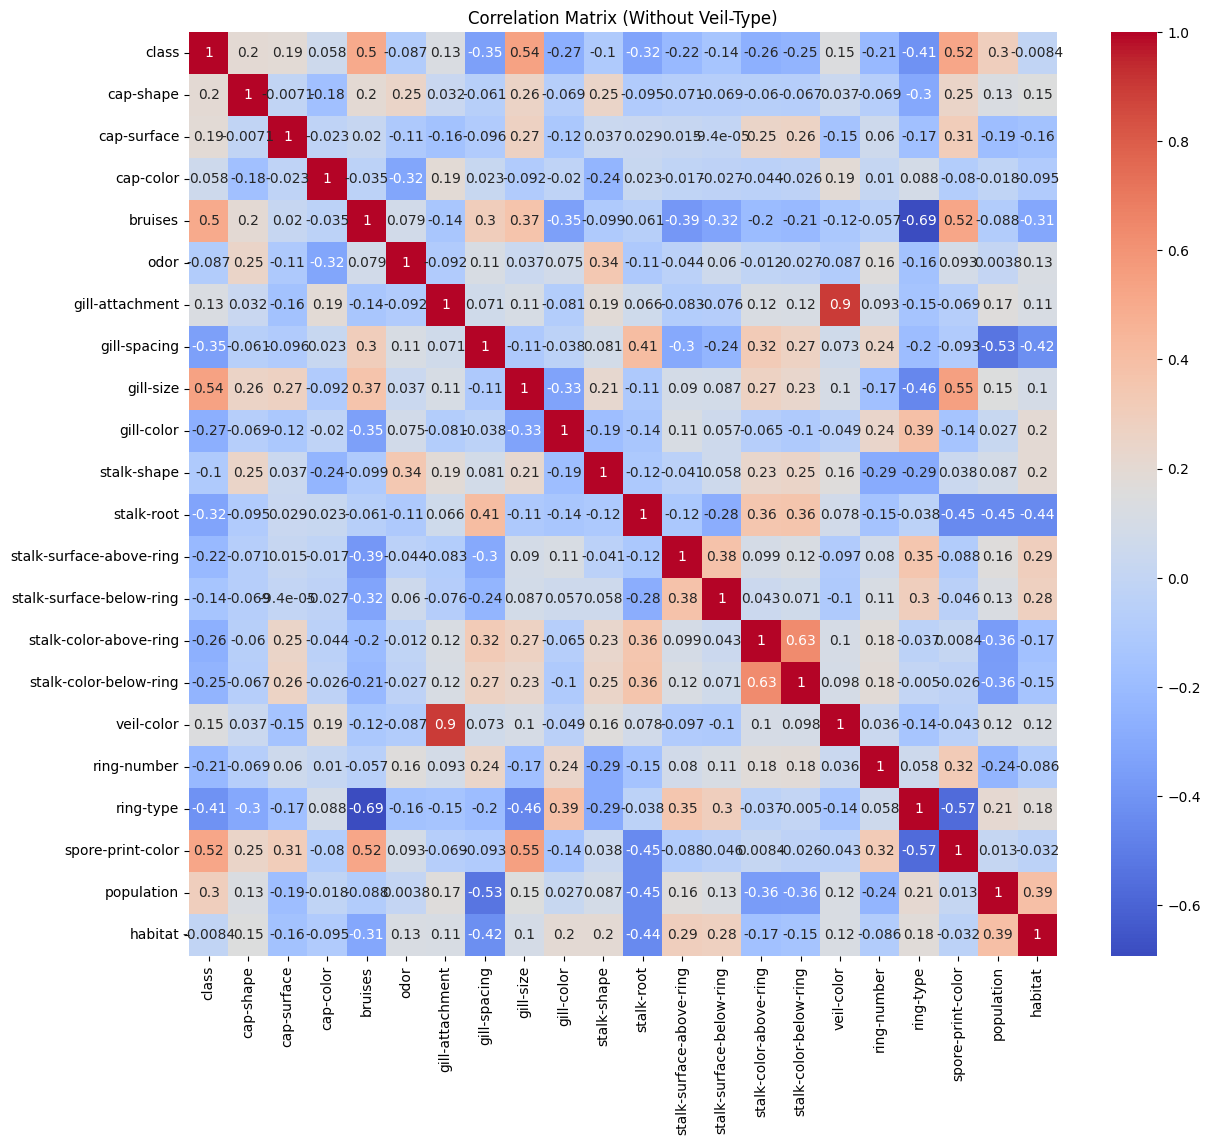

In [9]:
# Drop the 'veil-type' column from the dataset
df_veil_type = df.drop('veil-type', axis=1)

# Recompute the correlation matrix without the 'veil-type' column
corr_matrix = df_veil_type.corr()

# Plot the updated heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Without Veil-Type)')
plt.show()

In [44]:
# display columns to make sure that 'veil-type' is not being removed from my original dataset
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


# Task 2 - Train, Validate and Deploy a Machine Learning Pipeline using PyCaret

## Import Libraries and Load the Dataset

In [12]:
!pip install pycaret mlflow

In [13]:
# Importing necessary libraries
import pandas as pd
from pycaret.classification import *
import mlflow

In [14]:
# Load the dataset
df = pd.read_csv('02_mushroom_species_data.csv')

In [15]:
# Display the first few rows of the dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## PyCaret Setup
- Initialize the training environment and create the transformation pipeline

In [16]:
# Initialize the PyCaret setup
clf1 = setup(data=df, 
             target='class',
             session_id=123, 
             normalize=True)        # Normalizes the data
             #transformation=True,     # Apply power transformation to make data more Gaussian-like
             #combine_rare_levels=True, # Combines rare categories in categorical features
             #bin_numeric_features=None, # Automatically bins continuous data into intervals
             #silent=True, 
             #session_id=123,
             #verbose=False)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(8124, 111)"
6,Transformed train set shape,"(5686, 111)"
7,Transformed test set shape,"(2438, 111)"
8,Categorical features,22
9,Rows with missing values,2.4%


## Compare Models (Train and Validate Models with K-Fold Cross-Validation)

In [17]:
# Compare different models using cross-validation
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2040
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3170
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2200
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3500
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3240
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4880
lr,Logistic Regression,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,1.3380
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,0.2060
ada,Ada Boost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.3340
catboost,CatBoost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,2.1200


- Since most of the models have a perfect accuracy of 1, i choose a model with a lower accuracy such as navie bayes.
- A lower accuracy model is being chosen as an accuracy score of 1 model might be prone to overfitting 

In [18]:
# Create a Naive Bayes model
nb_model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9930,1.0000,0.9930,0.9931,0.9930,0.9859,0.9860
1,0.9877,1.0000,0.9877,0.9880,0.9877,0.9754,0.9757
2,0.9895,1.0000,0.9895,0.9897,0.9895,0.9789,0.9791
3,0.9912,0.9982,0.9912,0.9914,0.9912,0.9824,0.9826
4,0.9930,1.0000,0.9930,0.9931,0.9930,0.9859,0.9860
5,0.9947,0.9983,0.9947,0.9948,0.9947,0.9894,0.9895
6,0.9947,0.9983,0.9947,0.9948,0.9947,0.9894,0.9895
7,0.9789,0.9914,0.9789,0.9798,0.9789,0.9578,0.9586
8,0.9947,1.0000,0.9947,0.9948,0.9947,0.9894,0.9895


## Select and Tune the Model

- Did not do tuning as the model performance is already very high with 99% accuracy

## Analyse Model Performance

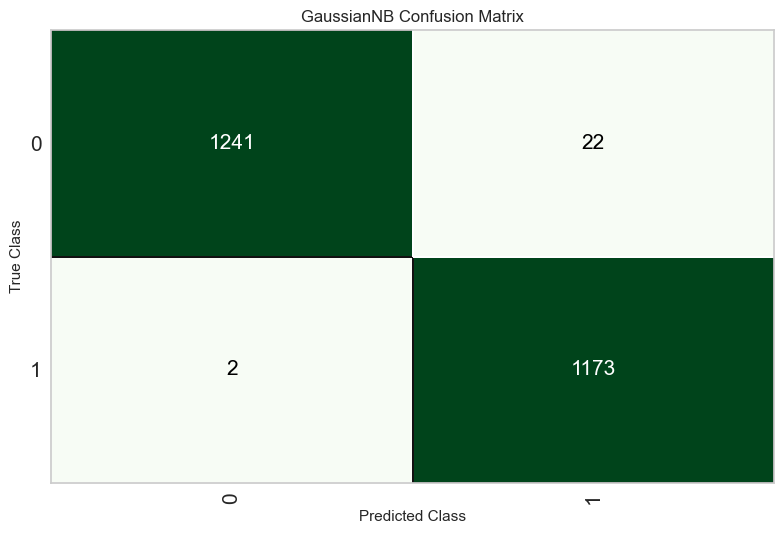

In [21]:
# since auc is not available, i used confusion matrix to assess model performance
plot_model(nb_model, plot='confusion_matrix')  # Plot the confusion matrix

- The model misclassifies 22 instances of class 0 as class 1
- Overall the classifier performs exceptionally well. with very high accuracay and balanced performance across both classes

In [24]:
evaluate_model(nb_model)  # This will give you a detailed performance report

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- 

## Prediction on Unseen Data

In [25]:
# Finalize the model and make predictions on the validation set
final_model = finalize_model(nb_model)  # Use the correct model variable
predictions = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9955,0.9953,0.9955,0.9955,0.9955,0.9910,0.9910


- Overall the metrices consistently show values above 0.99, indicating exceptional performance across all evaulation criteria
- The navie bayes model is perofrming extremely well on this classification task, with nearl-perfect scores in accuracy, precision, recall etc
- This suggests the model is highly effective at distinguishing between classes with very few misclassification

In [26]:
# show prediction df
predictions.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
3370,flat,scaly,brown,bruises,none,free,close,broad,white,tapering,...,partial,white,one,pendant,black,several,woods,edible,edible,1.0
4466,flat,fibrous,gray,no,foul,free,close,broad,chocolate,enlarging,...,partial,white,one,large,chocolate,solitary,grasses,poisonous,poisonous,1.0
4232,flat,smooth,white,bruises,foul,free,close,broad,pink,tapering,...,partial,white,one,pendant,chocolate,scattered,urban,poisonous,poisonous,1.0
5058,convex,smooth,buff,bruises,foul,free,close,broad,white,tapering,...,partial,white,one,pendant,chocolate,scattered,urban,poisonous,poisonous,1.0
6305,convex,smooth,red,no,foul,free,close,narrow,buff,tapering,...,partial,white,one,evanescent,white,several,path,poisonous,poisonous,1.0


In [27]:
# Copy data and drop class variable

new_data = df.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [28]:
# Predict using the finalized model on the new data
new_predictions = predict_model(final_model, data=new_data)
new_predictions.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,prediction_label,prediction_score
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,partial,white,one,pendant,black,scattered,urban,poisonous,1.0
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,partial,white,one,pendant,brown,numerous,grasses,edible,1.0
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,partial,white,one,pendant,brown,numerous,meadows,edible,1.0
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,partial,white,one,pendant,black,scattered,urban,poisonous,1.0
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,partial,white,one,evanescent,brown,abundant,grasses,edible,1.0


- The prediction for 'prediction_score' column on unseen data shows '1' for all the displayed rows. This indicates that the prediction is accurate

## Save Model/ the Entire Pipeline

In [29]:
# Save the model pipeline
save_model(final_model, 'final_mushroom_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                                               verbose=0))),
                 ('normalize',
                  TransformerWrapper(exclud

In [30]:
# Load the Pipeline
loaded_best_pipeline = load_model('final_mushroom_model')
print(loaded_best_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\65881\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,...
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
         

## Enable Experiment Logging with MLFlow

In [31]:
pip show mlflow pycaret

Name: mlflowNote: you may need to restart the kernel to use updated packages.

Version: 2.14.1
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: 
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.
        
                                        Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and 

In [32]:
pip install mlflow pycaret

Note: you may need to restart the kernel to use updated packages.


In [33]:
import os
import mlflow
import mlflow.sklearn  # Assuming the model is compatible with sklearn logging

# Silence Git warning
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

# Ensure no active runs are present
if mlflow.active_run() is not None:
    mlflow.end_run()

# Enable MLFlow logging
mlflow.set_tracking_uri("file:///mlruns")
mlflow.start_run(run_name="Mushroom_Classification")

# Log the model and other parameters
mlflow.sklearn.log_model(final_model, "final_mushroom_model")  # Use the appropriate log_model method based on your model type
mlflow.log_param("Normalization", "True")
mlflow.log_param("Transformation", "True")

mlflow.end_run()

## Register the Model with MLFlow

In [34]:
# Register the model with MLFlow
mlflow.register_model("final_mushroom_model", "Mushroom_Classifier")

Registered model 'Mushroom_Classifier' already exists. Creating a new version of this model...
Created version '7' of model 'Mushroom_Classifier'.


<ModelVersion: aliases=[], creation_timestamp=1724385293020, current_stage='None', description=None, last_updated_timestamp=1724385293020, name='Mushroom_Classifier', run_id=None, run_link=None, source='final_mushroom_model', status='READY', status_message=None, tags={}, user_id=None, version=7>

### Check

In [36]:
# Check the type before saving
print(type(final_model))  # Should print the correct pipeline type

# Save the model pipeline
save_model(final_model, 'final_mushroom_model')

# Load the pipeline to verify the saved object
loaded_pipeline = load_model('final_mushroom_model')
print(type(loaded_pipeline))  # Should still print the correct pipeline type


<class 'pycaret.internal.pipeline.Pipeline'>
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
<class 'pycaret.internal.pipeline.Pipeline'>
